# Application 2: Breast Cancer Detection  

Report precision, recall, and accuracy on the breast cancer dataset. 

Take 70% of data at random for training.

a. Try it using linear, SVM and Polynomial kernels

b. Identify good hyper-parameters for each kernel

In [1]:
import pandas as pd

from sklearn import datasets, preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
pd.DataFrame(cancer.feature_names)

,0
0,mean radius
1,mean texture
2,mean perimeter
3,mean area
4,mean smoothness
5,mean compactness
6,mean concavity
7,mean concave points
8,mean symmetry
9,mean fractal dimension


In [5]:
pd.DataFrame(cancer.target_names)

,0
0,malignant
1,benign


In [6]:
pd.DataFrame(cancer.data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Class Distribution: 

- 212 Malignant
- 357 Benign

In [7]:
# 1 => Benign
# 0 => Malignant
pd.DataFrame(cancer.target).value_counts() 

1    357
0    212
dtype: int64

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(cancer.data)

In [9]:
X[0]

array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
       0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=0)

In [11]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
sv_classifier = SVC()
classifiers.append(sv_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
dt_classifier = DecisionTreeClassifier()
classifiers.append(dt_classifier)
rf_classifier = RandomForestClassifier()
classifiers.append(rf_classifier)
xgb_classifier = XGBClassifier(eval_metric='logloss')
classifiers.append(xgb_classifier)

In [12]:
for classifier in classifiers:
    print(type(classifier))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("----")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.9590643274853801
Precision: 0.9809523809523809
Recall: 0.9537037037037037
----
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Accuracy: 0.9707602339181286
Precision: 0.9557522123893806
Recall: 1.0
----
<class 'sklearn.svm._classes.SVC'>
Accuracy: 0.9239766081871345
Precision: 0.8991596638655462
Recall: 0.9907407407407407
----
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.9473684210526315
Precision: 0.9626168224299065
Recall: 0.9537037037037037
----
<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy: 0.9239766081871345
Precision: 0.9439252336448598
Recall: 0.9351851851851852
----
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.9064327485380117
Precision: 0.96
Recall: 0.8888888888888888
----
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
----
<class 'xgb

In [13]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
dt_classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02112487, 0.        , 0.01815419, 0.        ,
       0.        , 0.        , 0.        , 0.04749283, 0.01058659,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02784245, 0.01016418, 0.08615112, 0.00990228,
       0.        , 0.01032055, 0.728114  , 0.03014695, 0.        ])

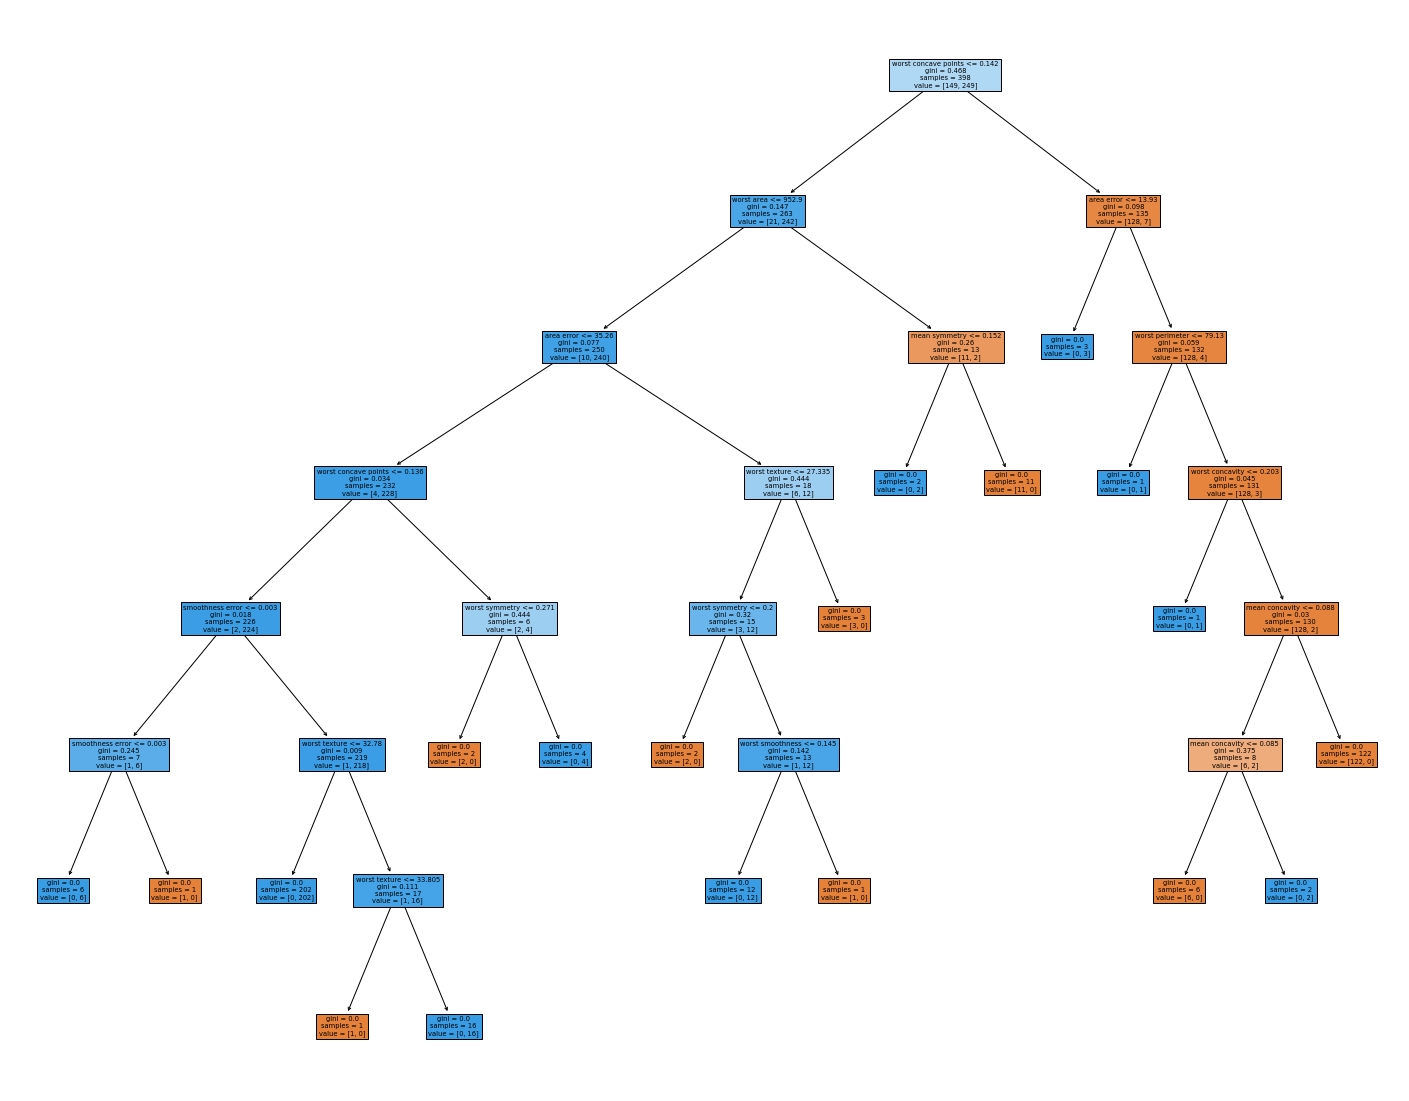

In [15]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_classifier, 
              feature_names = cancer.feature_names,
              filled=True)
plt.show()

In [16]:
fig.savefig("decision_tree.png")

## Random Forest
### Parameters

*n_estimators*
- The number of trees in the forest.

min_impurity_split : float, default=None
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

bootstrap : bool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

random_state : int, RandomState instance or None, default=None
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True)

oob_scorebool, default=False
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

n_jobsint, default=None
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.

warm_startbool, default=False
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.



#### Attributes

base_estimator_DecisionTreeClassifier
The child estimator template used to create the collection of fitted sub-estimators.

estimators_list of DecisionTreeClassifier
The collection of fitted sub-estimators.

classes_ndarray of shape (n_classes,) or a list of such arrays
The classes labels (single output problem), or a list of arrays of class labels (multi-output problem).

n_classes_int or list
The number of classes (single output problem), or a list containing the number of classes for each output (multi-output problem).

n_features_int
The number of features when fit is performed.

n_outputs_int
The number of outputs when fit is performed.

feature_importances_ndarray of shape (n_features,)
The impurity-based feature importances.

oob_score_float
Score of the training dataset obtained using an out-of-bag estimate. This attribute exists only when oob_score is True.

oob_decision_function_ndarray of shape (n_samples, n_classes)
Decision function computed with out-of-bag estimate on the training set. If n_estimators is small it might be possible that a data point was never left out during the bootstrap. 



Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


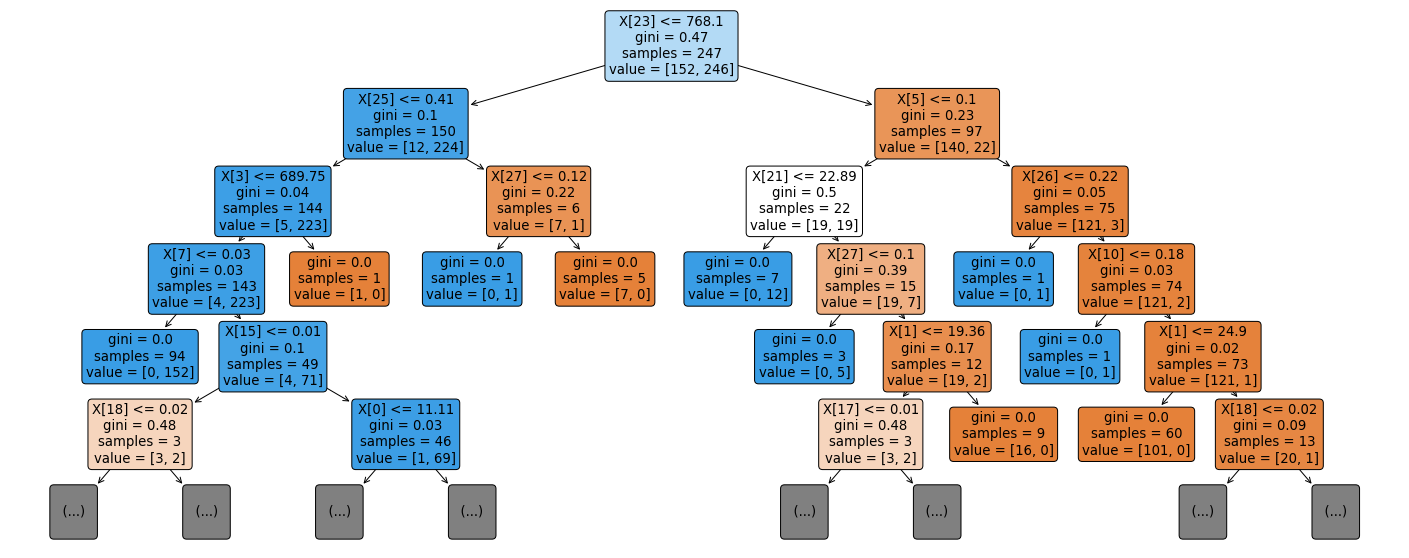

In [18]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
fig = plt.figure(figsize=(25,10))
plot_tree(rf_classifier.estimators_[0], 
                  max_depth = 5,
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()

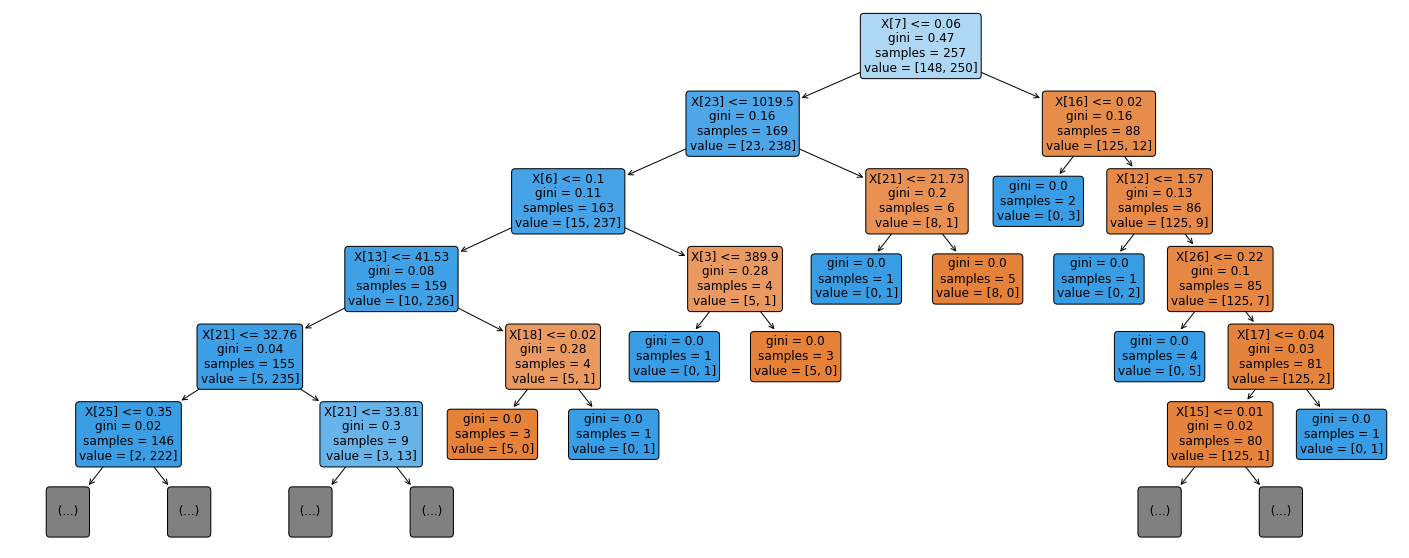

In [20]:
fig = plt.figure(figsize=(25,10))
plot_tree(rf_classifier.estimators_[1], 
                  max_depth = 5,
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()